In [1]:
from src.solution import MultiODPath, MultiODSolution
from src.problem import MultiODProblem
from src.operators import *
from src.utils import display_result

p = MultiODProblem(num_O=8, num_taxi=1, seed=1)
paths = [[0, 1, 9, 8, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]
paths1 = [[0, 1, 8, 9, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths2 = [[0, 1, 9, 8, 16, 5, 17, 3, 2, 7, 4, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths3 = [[i for i in range(18)] + [0]]
s = MultiODSolution(paths3, p)

In [2]:
path = s.paths[0]

In [28]:
o1 = TwoOptOperator()
o2 = ExchangeOperator()
o3 = InsertOperator()
o4 = OForwardOperator(length=2)
o5 = DBackwardOperator(length=2)
o6 = ODPairsExchangeOperator()
o7 = RandomODPairsExchangeOperator(change_percentage=0.1)
o8 = RandomOForwardOperator(change_percentage=0.1)
o9 = RandomDBackwardOperator(change_percentage=0.1)
o10 = OForwardOperator(length=3)
o11 = SegmentTwoOptOperator()
o12 = OForwardOperator(length=1)
o13 = DBackwardOperator(length=1)

In [59]:
# randomly exchange OD pairs given certain percentage
improved_path, min_delta, label = o11(s)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))
# fig = display_result(p, s)

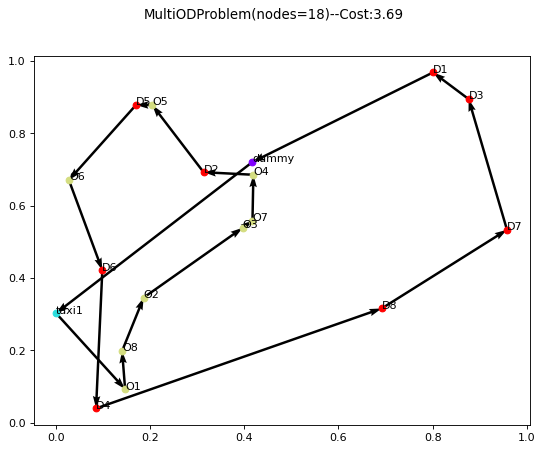

In [58]:
fig = display_result(p, s)

In [43]:
# read lkh3 tour 
from src.solution import MultiODSolution
def get_lkh3_tour(tour_path):
    with open(tour_path) as f:
        while line := f.readline():
            if line.rstrip() == 'TOUR_SECTION':
                tour_before_mapping = []
                while (node := f.readline().rstrip()) != '-1':
                    tour_before_mapping.append(int(node))
    _node_reorder = [1, 2] + [i for i in range(1, len(tour_before_mapping) + 1) if i > 2 and i % 2 != 0] + [i for i in range(1, len(tour_before_mapping) + 1) if i > 2 and i % 2 == 0]
    node_index_mapping = {old_index: new_index for new_index, old_index in enumerate(_node_reorder)}
    tour_before_reverse = [node_index_mapping[old_index] for old_index in tour_before_mapping]
    subtour_to_reverse = tour_before_reverse[2:]
    tour = tour_before_reverse[:2] + subtour_to_reverse[::-1] + [0]
    return tour 


In [2]:
import os 
lkh3_dir = os.path.join('/home/fangbowen/', 'U')
lkh3_results = os.listdir(lkh3_dir)

In [29]:
lkh3_results[1]

'random-020-32388.6592.tour'

In [31]:
res = lkh3_results[1]
res

'random-020-32388.6592.tour'

In [44]:
tour = get_lkh3_tour(os.path.join(lkh3_dir, res))

In [49]:
from src.problem import MultiODProblem
from src.utils import read_instance_data, display_result

In [38]:
instance_name = 'random-020-32388.tsp'
instance = f'/home/fangbowen/LAHR/data/tsppdlib/instances/random-uniform/{instance_name}'
locations = read_instance_data(instance)

In [45]:
problem = MultiODProblem(locations=locations, ignore_to_dummy_cost=False)

In [46]:
sol = MultiODSolution([tour], problem)

In [48]:
problem.calc_cost(sol)

6592.168471148532

In [50]:
problem.convert_distance_matrix_to_int()

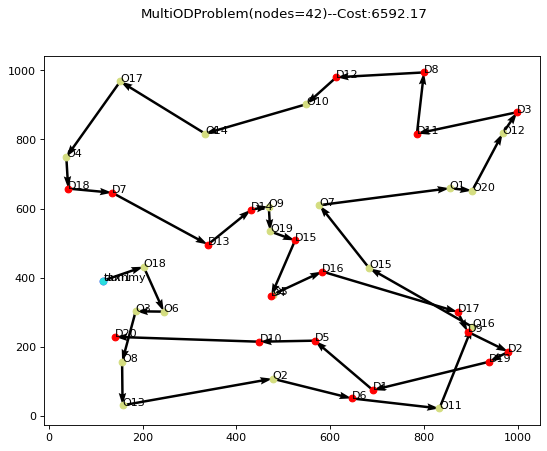

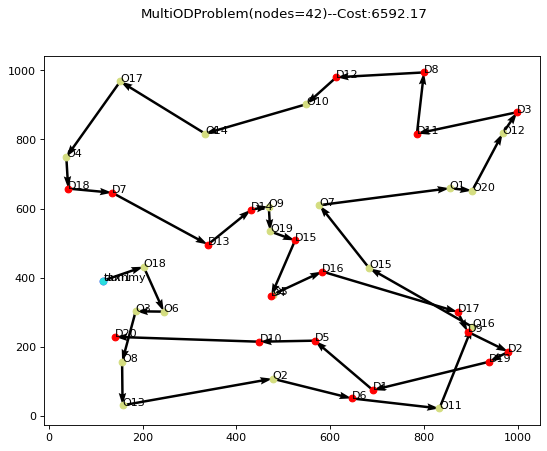

In [51]:
display_result(problem, sol)